In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
path = "D:\\datasets\\twitter\\ukrain-russia\\tweets.csv"

In [3]:
dataset = pd.read_csv(path)

C:\Users\Rohan R\AppData\Local\Temp\ipykernel_7884\556193593.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(path)


In [4]:
dataset.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2022-02-24 03:12:47+00:00,1496684505247141888.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,2022-02-24 03:18:54+00:00,1496686044275695616.0,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,2022-02-24 03:22:42+00:00,1496687000375726080.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,2022-02-24 03:25:36+00:00,1496687731434565632.0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,2022-02-24 03:27:28+00:00,1496688201242759168.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0


In [5]:
dataset.describe()

,ReplyCount,RetweetCount,LikeCount,hastag_counts
count,44070.000000,44070.000000,4.407000e+04,44066.000000
mean,0.887474,2.671681,1.368781e+14,4.039827
std,10.443866,37.890258,1.436683e+16,2.685003
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000e+00,2.000000
50%,0.000000,0.000000,1.000000e+00,3.000000
75%,0.000000,1.000000,2.000000e+00,5.000000
max,945.000000,5436.000000,1.508172e+18,29.000000


# Now lets check the column names and its contents

In [6]:
dataset.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

lets check the null values present in the dataset.

In [7]:
dataset.isnull().sum()

Datetime          163840
Tweet Id          308964
Text              308964
Username          355786
Permalink         355786
User              355786
Outlinks          378898
CountLinks        378898
ReplyCount        355786
RetweetCount      355786
LikeCount         355786
QuoteCount        355786
ConversationId    355786
Language          355790
Source            355790
Media             386557
QuotedTweet       392113
MentionedUsers    387415
hashtag           355790
hastag_counts     355790
dtype: int64

Hence the dataset contains huge number of null values in its entities so there are nearly 70%-80% of data are garbage values . so this needs some carefull extraction of the data and we couldnt waste any of the data . 

## First we deal with Datetime column by analysisng and feature cleaning

In [8]:
dateandtime = pd.DataFrame(dataset['Datetime'])

In [9]:
dateandtime.head()

,Datetime
0,2022-02-24 03:12:47+00:00
1,2022-02-24 03:18:54+00:00
2,2022-02-24 03:22:42+00:00
3,2022-02-24 03:25:36+00:00
4,2022-02-24 03:27:28+00:00


In [10]:
len(dateandtime.value_counts())

39020

in the above dataset for the datetime column as per the above check we can conclude that it is in datatype = object type , and contains 39k+ unique values. since the tweets are tweeted in 39+ different time units which are almost 4lakh of tweets in these time units.

In [11]:
dateandtime.value_counts()

Datetime                                                                                   
#Ukraine | #Russia | #Biden | #Russian | #Putin | #After | #China | #War | #Up | #Deal         61955
#Ukraine | #Biden | #Putin | #After | #Russia | #War | #Russian | #China | #Up | #Ukrainian    55317
#Ukraine | #Biden | #Russia | #After | #Putin | #War | #China | #Russian | #Up | #Remain       15653
2022-03-27 08:00:02+00:00                                                                      15653
2022-03-27 16:00:01+00:00                                                                      12805
                                                                                               ...  
2022-03-26 02:38:52+00:00                                                                          1
2022-03-26 02:39:09+00:00                                                                          1
2022-03-26 02:39:21+00:00                                                                          1

from the above description we can say that the datetime column data is more corrupt and not so absolute with only date and time it has also hashtags mixed with it . so anyways these date and time data is not required as it is counts are more with redundancy there will be more varience in the data so we will remove this attribute form the dataset

In [12]:
data1 = dataset.drop('Datetime',axis=1) 

In [13]:
data1.head()

,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,1496684505247141888.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,1496686044275695616.0,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,1496687000375726080.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,1496687731434565632.0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,1496688201242759168.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0


## Now we deal with the Tweet id column and successfully removed datetime from previous data

In [14]:
data1.columns

Index(['Tweet Id', 'Text', 'Username', 'Permalink', 'User', 'Outlinks',
       'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount',
       'ConversationId', 'Language', 'Source', 'Media', 'QuotedTweet',
       'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

In [15]:
tweetid = pd.DataFrame(data1['Tweet Id'])

In [16]:
tweetid.head(10)

,Tweet Id
0,1496684505247141888.0
1,1496686044275695616.0
2,1496687000375726080.0
3,1496687731434565632.0
4,1496688201242759168.0
5,1496689162715648000.0
6,1496689234299789312.0
7,1496689583366586368.0
8,1496690389364977664.0
9,1496690894480752640.0


In [17]:
tweetid.describe()

,Tweet Id
count,90892
unique,44071
top,1507990816849027075
freq,15653


In [18]:
tweetid.isnull().sum()

Tweet Id    308964
dtype: int64

In Tweet Id column there are 3 lakh+ null values are there hence these many unknown tweets are there this is the missing values in this column but 90K+ known Tweet Ids are present in that 15k+ users are tweeted frequently.44k+ unique users are present

In [19]:
tweetid_nonull = tweetid.dropna()

In [20]:
tweetid_nonull

,Tweet Id
0,1496684505247141888.0
1,1496686044275695616.0
2,1496687000375726080.0
3,1496687731434565632.0
4,1496688201242759168.0
...,...
399851,1508232258037112834
399852,1508232263930105861
399853,1508232290413219841
399854,1508232332289126401


In [21]:
print(tweetid_nonull['Tweet Id'].unique())

[1.496684505247142e+18 1.4966860442756956e+18 1.496687000375726e+18 ...
 '1508232290413219841' '1508232332289126401' '1508232337229852679']


In [22]:
tweet_count = tweetid_nonull.groupby('Tweet Id')['Tweet Id'].agg('count').sort_values(ascending = False)

In [23]:
tweet_count

Tweet Id
1507990816849027075       15653
1508111610329579522       12804
1508172010358202377       12199
1.5079455176150958e+18     6166
TomPaineToday                 4
                          ...  
1.5076635659766497e+18        1
1.5076636276916388e+18        1
1.5076637383081206e+18        1
1.5076637752809062e+18        1
1507993832994099204           1
Name: Tweet Id, Length: 44071, dtype: int64

Now the tweet ids which have tweeted less than 4 times are marked as other unit individuals id as "other_individuals"

In [24]:
less_tweet = tweet_count[tweet_count<4]

In [25]:
less_tweet

Tweet Id
1508115986955882504       1
1508115931930804226       1
1508115805485080577       1
1508115819972083714       1
1508115867736981508       1
                         ..
1.5076635659766497e+18    1
1.5076636276916388e+18    1
1.5076637383081206e+18    1
1.5076637752809062e+18    1
1507993832994099204       1
Name: Tweet Id, Length: 44066, dtype: int64

In [26]:
tweetid_nonull['Tweet Id'] = tweetid_nonull['Tweet Id'].apply(lambda x: 'other_individuals' if x in less_tweet else x)

C:\Users\Rohan R\AppData\Local\Temp\ipykernel_7884\658159675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetid_nonull['Tweet Id'] = tweetid_nonull['Tweet Id'].apply(lambda x: 'other_individuals' if x in less_tweet else x)


In [27]:
tweetid_nonull['Tweet Id'].unique()

array(['other_individuals', 1.5079455176150958e+18, 'TomPaineToday',
       '1507990816849027075', '1508111610329579522',
       '1508172010358202377'], dtype=object)

In [28]:
tweetid_nonull.value_counts()

Tweet Id              
other_individuals         44066
1507990816849027075       15653
1508111610329579522       12804
1508172010358202377       12199
1.5079455176150958e+18     6166
TomPaineToday                 4
dtype: int64

In [29]:
lis = list('''other_individuals 44066 1507990816849027075 15653 1508111610329579522 12804 1508172010358202377 12199 1.5079455176150958e+18 6166 TomPaineToday 4'''.split(' '))

In [30]:
x = []
y=[]
for i in range(len(lis)):
    if i%2==0:
        y.append(lis[i])
    else:
        x.append(int(lis[i]))

In [31]:
import seaborn as sns

<AxesSubplot:>

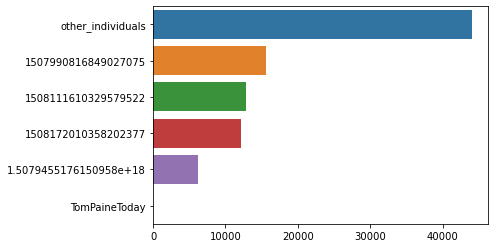

In [32]:
sns.barplot(
    x=x, y=y
)

From the above barplot we can conclude that there are 40k+ unique users has give tweets less than 4. but when you see the remaining users its more than 10k+ by each user which is impossible that a single individual has tweeted this much so . there is a data redundency in this attribute so we descide to drop this attribute.

In [33]:
data2 = data1.drop('Tweet Id',axis=1)

In [34]:
data2.columns

Index(['Text', 'Username', 'Permalink', 'User', 'Outlinks', 'CountLinks',
       'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount',
       'ConversationId', 'Language', 'Source', 'Media', 'QuotedTweet',
       'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

## Now lets deal with the columns username, permalink , user

In [35]:
data2['Username'].isnull().sum()

355786

In [36]:
username=pd.DataFrame(data2['Username'].value_counts())

In [37]:
username

,Username
MovieXen,715
knittingknots,218
Moritzbhg,207
GvanKeulen,127
taataaat,123
...,...
UKRinALB,1
Zohir41300045,1
rafaelbarrasa,1
KroliczekK,1


In [38]:
username['users'] = username.index

In [39]:
username = username.reset_index()

In [40]:
username = username.drop('index',axis=1)
username['counts'] = username['Username']
username = username.drop('Username',axis=1)

In [41]:
username

,users,counts
0,MovieXen,715
1,knittingknots,218
2,Moritzbhg,207
3,GvanKeulen,127
4,taataaat,123
...,...,...
23106,UKRinALB,1
23107,Zohir41300045,1
23108,rafaelbarrasa,1
23109,KroliczekK,1


In [42]:
username_top_20 = pd.DataFrame(username.iloc[:20])

In [43]:
username_top_20

,users,counts
0,MovieXen,715
1,knittingknots,218
2,Moritzbhg,207
3,GvanKeulen,127
4,taataaat,123
5,orfonline,123
6,sightmagazine,119
7,IdeologyWars,115
8,GarryP40090847,115
9,fns124,107


<AxesSubplot:xlabel='counts', ylabel='users'>

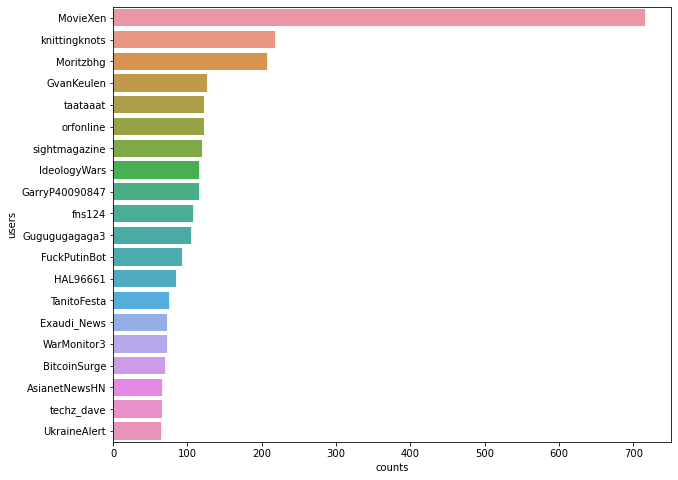

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x=username_top_20['counts'],y=username_top_20['users'], data = username_top_20)

In [45]:
user_top_40 = pd.DataFrame(username.iloc[:40])
user_top_40 = user_top_40.set_index('users')

Text(0.5, 1.0, 'user data')

<Figure size 1440x1440 with 0 Axes>

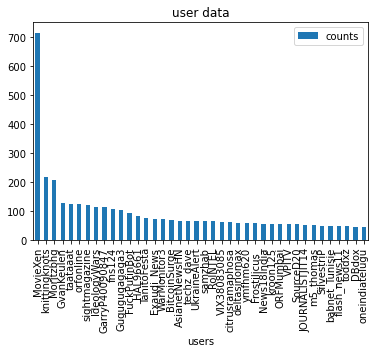

In [46]:
plt.figure(figsize=(20,20))
user_top_40.plot(kind='bar')
plt.title('user data')

In [47]:
data2['Permalink']

0         https://twitter.com/IdeologyWars/status/149668...
1         https://twitter.com/IdeologyWars/status/149668...
2         https://twitter.com/IdeologyWars/status/149668...
3         https://twitter.com/IdeologyWars/status/149668...
4         https://twitter.com/IdeologyWars/status/149668...
                                ...                        
399851    https://twitter.com/RenKeNews/status/150823225...
399852    https://twitter.com/philmarso/status/150823226...
399853    https://twitter.com/dicke5/status/150823229041...
399854    https://twitter.com/vsdawson_MUFC/status/15082...
399855    https://twitter.com/satillus/status/1508232337...
Name: Permalink, Length: 399856, dtype: object

In [48]:
data2['Permalink'].isnull().sum()

355786

the permalink column is the https links fo different pages in twitter so this attribute is no need so dropping from the dataset

In [49]:
user = data2['User'].value_counts()

In [50]:
user

https://twitter.com/MovieXen         715
https://twitter.com/knittingknots    218
https://twitter.com/Moritzbhg        207
https://twitter.com/GvanKeulen       127
https://twitter.com/taataaat         123
                                    ... 
https://twitter.com/UKRinALB           1
https://twitter.com/Zohir41300045      1
https://twitter.com/rafaelbarrasa      1
https://twitter.com/KroliczekK         1
https://twitter.com/satillus           1
Name: User, Length: 23111, dtype: int64

User column is the http link of the user account so its not that important when we have usernames column , hence both are same so we can drop the User column from the data.

In [51]:
data3= data2.drop(['Permalink', 'User'],axis=1)

In [52]:
data3.columns

Index(['Text', 'Username', 'Outlinks', 'CountLinks', 'ReplyCount',
       'RetweetCount', 'LikeCount', 'QuoteCount', 'ConversationId', 'Language',
       'Source', 'Media', 'QuotedTweet', 'MentionedUsers', 'hashtag',
       'hastag_counts'],
      dtype='object')

## Now checking the 'Outlinks', 'CountLinks' columns 

In [53]:
data3[['Outlinks','CountLinks']]

,Outlinks,CountLinks
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
399851,['https://tass.com/world/1428013'],['https://t.co/6Ukollhqfj']
399852,NaN,NaN
399853,NaN,NaN
399854,['https://www.thestar.com.my/lifestyle/culture...,['https://t.co/qPGVgr6li1']


In [54]:
data3['Outlinks'].isnull().sum()

378898

In [55]:
data3['CountLinks'].isnull().sum()

378898

Both the outlinks and countlinks column has 95% of null values so this columns are not needed anymore so drop them.

In [56]:
data4 = data3.drop(['Outlinks','CountLinks'],axis=1)

In [57]:
data4.columns

Index(['Text', 'Username', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

## lets check with the columns such as Conversationid , source , media , quotedtweet and mentioned users

In [58]:
data4['ConversationId']

0         1496493071495987200.0
1         1496493071495987200.0
2         1496493071495987200.0
3         1496493071495987200.0
4         1496493071495987200.0
                  ...          
399851      1508232258037112834
399852      1508135128706560000
399853      1508232290413219841
399854      1508232332289126401
399855      1508232337229852679
Name: ConversationId, Length: 399856, dtype: object

In [59]:
data4['ConversationId'].isnull().sum()

355786

In [60]:
data4['Source']

0         <a href="https://mobile.twitter.com" rel="nofo...
1         <a href="https://mobile.twitter.com" rel="nofo...
2         <a href="https://mobile.twitter.com" rel="nofo...
3         <a href="https://mobile.twitter.com" rel="nofo...
4         <a href="https://mobile.twitter.com" rel="nofo...
                                ...                        
399851    <a href="https://mobile.twitter.com" rel="nofo...
399852    <a href="https://mobile.twitter.com" rel="nofo...
399853    <a href="http://twitter.com/download/android" ...
399854    <a href="http://twitter.com/download/android" ...
399855    <a href="http://instagram.com" rel="nofollow">...
Name: Source, Length: 399856, dtype: object

In [61]:
data4['Source'].value_counts()

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 16838
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    12461
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       9586
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        1409
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      1116
                                                                                        ...  
<a href="https://www.playstation.com" rel="nofollow">PlayStation®Network</a>                1
<a href="https://newsmaker.md" rel="nofollow">NewsMaker.md Publisher</a>                    1
<a href="http://www.finansgundem.com" rel="nofollow">Finansgundem Social App</a>            1
<a href="http://www.news24.jp" rel="nofollow">日テレNEWS24</a>                                 1
<a href="http://www.samruston.co.uk" rel="nofollow">Flamingo

In [62]:
data4['Media']

0         [Photo(previewUrl='https://pbs.twimg.com/media...
1         [Video(thumbnailUrl='https://pbs.twimg.com/ext...
2         [Video(thumbnailUrl='https://pbs.twimg.com/ext...
3         [Video(thumbnailUrl='https://pbs.twimg.com/ext...
4         [Video(thumbnailUrl='https://pbs.twimg.com/ext...
                                ...                        
399851                                                  NaN
399852                                                  NaN
399853                                                  NaN
399854                                                  NaN
399855                                                  NaN
Name: Media, Length: 399856, dtype: object

In [63]:
data4['Media'].isnull().sum()

386557

In [64]:
data4[['QuotedTweet', 'MentionedUsers']]

,QuotedTweet,MentionedUsers
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
399851,NaN,NaN
399852,NaN,"[User(username='CNEWS', id=18396319, displayna..."
399853,NaN,NaN
399854,NaN,NaN


In [65]:
data4[['QuotedTweet', 'MentionedUsers']].isnull().sum()

QuotedTweet       392113
MentionedUsers    387415
dtype: int64

In [66]:
data5 = data4.drop(['ConversationId','Source','Media','QuotedTweet', 'MentionedUsers'],axis=1)

In [67]:
data5.columns

Index(['Text', 'Username', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'Language', 'hashtag', 'hastag_counts'],
      dtype='object')

The columns such as 'ConversationId','Source','Media','QuotedTweet', 'MentionedUsers' are containing null values more than 95% of its data and source column has the device data in which the number of users used which devices , ConversationId are the other user ids in which these columns are not needed so droped them from the data.

In [68]:
data5.head()

,Text,Username,ReplyCount,RetweetCount,LikeCount,QuoteCount,Language,hashtag,hastag_counts
0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,2.0,17.0,47.0,1.0,en,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,2.0,104.0,188.0,8.0,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,1.0,41.0,75.0,5.0,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,21.0,407.0,1099.0,149.0,en,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,7.0,152.0,207.0,22.0,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0


In [69]:
data5.isnull().sum()

Text             308964
Username         355786
ReplyCount       355786
RetweetCount     355786
LikeCount        355786
QuoteCount       355786
Language         355790
hashtag          355790
hastag_counts    355790
dtype: int64

As the dataset has most of the null values in its data so there are hardly 40K+ datapoints are available which are actual data so we intend to drop all the null values 

In [70]:
data6 = data5.dropna()

In [71]:
data6.describe()

,ReplyCount,RetweetCount,LikeCount,hastag_counts
count,44066.000000,44066.000000,44066.000000,44066.000000
mean,0.887555,2.671924,11.839740,4.039827
std,10.444337,37.891969,235.251847,2.685003
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,1.000000,3.000000
75%,0.000000,1.000000,2.000000,5.000000
max,945.000000,5436.000000,36193.000000,29.000000


### The Text column contains the tweet text with hashtags but in tweet message there are different language and hashtags are included but we have seperate well defined attribute for the language and hashtags in the data , anyways in tweeter data we will deal with hashtags and this data does not contain any sentiment related variable so this text data can be removed without any hesitation.

In [72]:
data6['Text']

0         🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1         🇺🇦 Kharkiv is officially being struck by major...
2         🇺🇦 More angles on that strike in Kharkiv. #Rus...
3         🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4         🇺🇦 Damage caused by strike in Kharkiv... #Russ...
                                ...                        
399851    Russia’s mass media and telecommunications wat...
399852    @tony07653102 @CNEWS Pour comprendre un confli...
399853    Putin ukrajinske vojnike naziva neonacizmom, a...
399854    Watch: amid war ruins in #Ukraine, unbowed cla...
399855    #britishsummertime started on Sunday 27th.\n\n...
Name: Text, Length: 44066, dtype: object

In [73]:
data7 = data6.drop('Text',axis=1)

In [74]:
data7

,Username,ReplyCount,RetweetCount,LikeCount,QuoteCount,Language,hashtag,hastag_counts
0,IdeologyWars,2.0,17.0,47.0,1.0,en,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,IdeologyWars,2.0,104.0,188.0,8.0,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,IdeologyWars,1.0,41.0,75.0,5.0,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,IdeologyWars,21.0,407.0,1099.0,149.0,en,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,IdeologyWars,7.0,152.0,207.0,22.0,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
...,...,...,...,...,...,...,...,...
399851,RenKeNews,1.0,0.0,6.0,0,en,"['#RussiaUkraineWar', '#Russia', '#Ukraine']",3.0
399852,philmarso,0.0,0.0,1.0,0,fr,['#Ukraine'],1.0
399853,dicke5,0.0,0.0,0.0,0,und,"['#Putin,', '#Ukrajina,', '#Zelenskij']",3.0
399854,vsdawson_MUFC,0.0,0.0,0.0,0,en,"['#Ukraine,']",1.0


In [75]:
username_reduce =username.set_index('users')

In [76]:
username_reduce

,counts
users,
MovieXen,715
knittingknots,218
Moritzbhg,207
GvanKeulen,127
taataaat,123
...,...
UKRinALB,1
Zohir41300045,1
rafaelbarrasa,1


In [77]:
username_reduce['counts'].unique()

array([715, 218, 207, 127, 123, 119, 115, 107, 105,  93,  84,  75,  73,
        72,  70,  66,  65,  64,  63,  61,  60,  58,  57,  56,  55,  54,
        51,  50,  49,  48,  47,  46,  45,  44,  42,  41,  40,  38,  37,
        36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,
        23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,
        10,   9,   8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [78]:
username_reduce['counts'].unique().mean()

56.08

So for the username count more than 50 the name remains the same , hence the usernames repeted below 50 will be named as others

In [79]:
user_name = data7.groupby('Username')['Username'].agg('count').sort_values(ascending = False)

In [80]:
user_name

Username
MovieXen          715
knittingknots     218
Moritzbhg         207
GvanKeulen        127
orfonline         123
                 ... 
NewsJunkieBlu       1
NewsIADN            1
NewsForFuture       1
NewsFacilities      1
zzzbeeme            1
Name: Username, Length: 23110, dtype: int64

In [81]:
username_less_than_50 = user_name[user_name<50]

In [82]:
username_less_than_50

Username
babnet_Tunisie    49
SilvestriP        49
flash_news11      48
toddxz            47
DBdox             46
                  ..
NewsJunkieBlu      1
NewsIADN           1
NewsForFuture      1
NewsFacilities     1
zzzbeeme           1
Name: Username, Length: 23076, dtype: int64

In [83]:
data7['Username'] = data7['Username'].apply(lambda x: 'others' if x in username_less_than_50 else x)

In [84]:
data7['Username']

0         IdeologyWars
1         IdeologyWars
2         IdeologyWars
3         IdeologyWars
4         IdeologyWars
              ...     
399851          others
399852          others
399853          others
399854          others
399855          others
Name: Username, Length: 44066, dtype: object

### Now column Replycount , RetweetCount, 	LikeCount, and	QuoteCount

In [85]:
data7.columns

Index(['Username', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount',
       'Language', 'hashtag', 'hastag_counts'],
      dtype='object')

In [86]:
data7['ReplyCount'].value_counts()

0.0      33794
1.0       6521
2.0       1589
3.0        682
4.0        343
         ...  
164.0        1
67.0         1
81.0         1
70.0         1
76.0         1
Name: ReplyCount, Length: 115, dtype: int64

In [87]:
# replycount = data7.groupby('ReplyCount')['ReplyCount'].agg('Count').sort_values(ascending = False)

In [88]:
reply_stat = pd.DataFrame(data7['ReplyCount'])

In [89]:
reply_stat

,ReplyCount
0,2.0
1,2.0
2,1.0
3,21.0
4,7.0
...,...
399851,1.0
399852,0.0
399853,0.0
399854,0.0


In [90]:
reply_stat['ReplyCount'] = reply_stat['ReplyCount'].apply(lambda x:'more than 10' if x >10 else x)

In [91]:
reply_data = pd.DataFrame(reply_stat.value_counts())

In [92]:
reply_data.reset_index()

,ReplyCount,0
0,0.0,33794
1,1.0,6521
2,2.0,1589
3,3.0,682
4,more than 10,468
5,4.0,343
6,5.0,195
7,6.0,153
8,7.0,122
9,8.0,79


Text(0, 0.5, 'Reply_nos')

<Figure size 720x576 with 0 Axes>

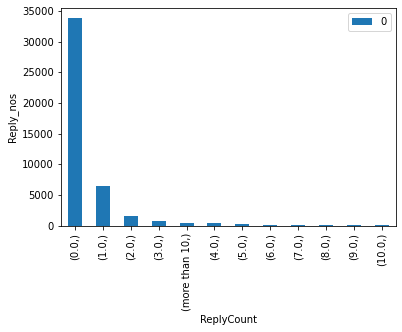

In [93]:
plt.figure(figsize=(10,8))
reply_data.plot(kind='bar')
plt.ylabel('Reply_nos')


In [94]:
retweet_stat = pd.DataFrame(data7['RetweetCount'])
retweet_stat

,RetweetCount
0,17.0
1,104.0
2,41.0
3,407.0
4,152.0
...,...
399851,0.0
399852,0.0
399853,0.0
399854,0.0


In [95]:
retweet_stat['RetweetCount'] = retweet_stat['RetweetCount'].apply(lambda x: 'more than 50' if x >10 else x)

In [96]:
retweet_stat['RetweetCount'].value_counts()

0.0             30701
1.0              6259
2.0              2221
more than 50     1460
3.0              1163
4.0               678
5.0               501
6.0               328
7.0               260
8.0               188
9.0               169
10.0              138
Name: RetweetCount, dtype: int64

In [97]:
retweet_data = pd.DataFrame(retweet_stat['RetweetCount'].value_counts())

Text(0.5, 0, 'Retweet_nums')

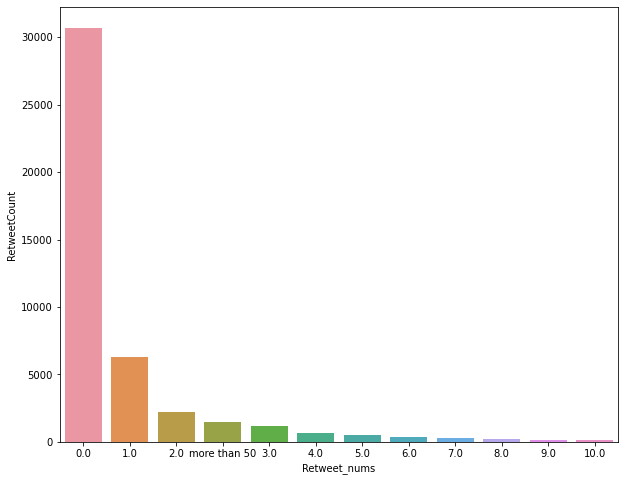

In [98]:
retweet_data = retweet_data.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x=retweet_data['index'],y=retweet_data.RetweetCount)
plt.xlabel('Retweet_nums')

In [99]:
data7.head()

,Username,ReplyCount,RetweetCount,LikeCount,QuoteCount,Language,hashtag,hastag_counts
0,IdeologyWars,2.0,17.0,47.0,1.0,en,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,IdeologyWars,2.0,104.0,188.0,8.0,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,IdeologyWars,1.0,41.0,75.0,5.0,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,IdeologyWars,21.0,407.0,1099.0,149.0,en,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,IdeologyWars,7.0,152.0,207.0,22.0,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0


In [100]:
like_stat = pd.DataFrame(data7['LikeCount'])

In [101]:
like_stat

,LikeCount
0,47.0
1,188.0
2,75.0
3,1099.0
4,207.0
...,...
399851,6.0
399852,1.0
399853,0.0
399854,0.0


In [102]:
like_stat['LikeCount'] = like_stat['LikeCount'].apply(lambda x: 'more than 10' if x>10 else x)

In [103]:
like_stat.value_counts()

LikeCount   
0.0             20661
1.0              8514
2.0              4019
more than 10     4002
3.0              2190
4.0              1365
5.0               962
6.0               735
7.0               527
8.0               452
9.0               365
10.0              274
dtype: int64

<AxesSubplot:xlabel='LikeCount', ylabel='count'>

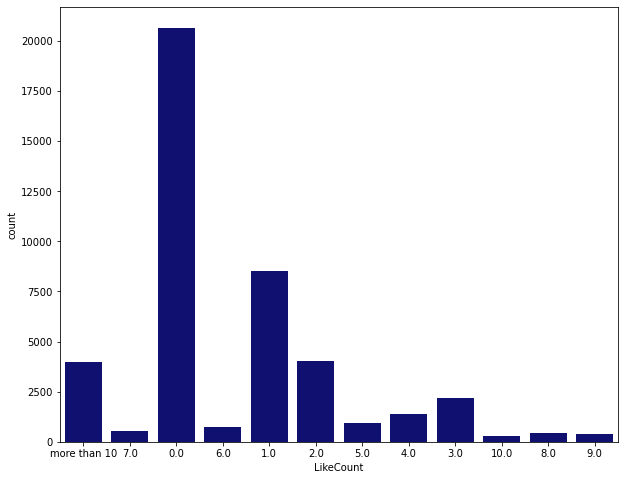

In [104]:
plt.figure(figsize=(10,8))
sns.countplot(x=like_stat['LikeCount'],color = 'navy')

In [105]:
data7['QuoteCount']

0           1.0
1           8.0
2           5.0
3         149.0
4          22.0
          ...  
399851        0
399852        0
399853        0
399854        0
399855        0
Name: QuoteCount, Length: 44066, dtype: object

In [106]:
Quote_stat = pd.DataFrame(data7['QuoteCount'])

<AxesSubplot:xlabel='QuoteCount', ylabel='count'>

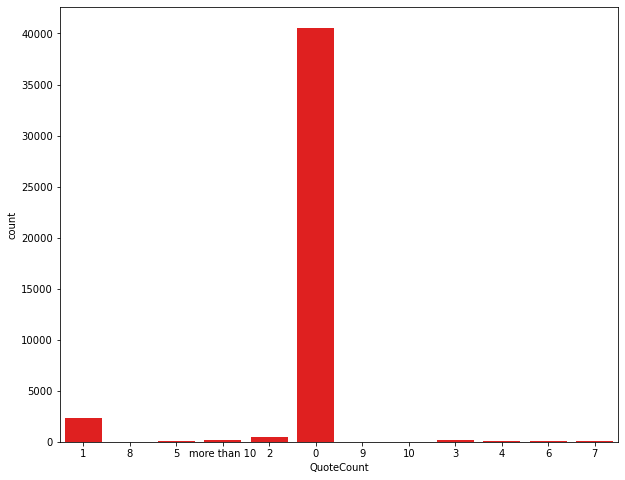

In [107]:
Quote_stat['QuoteCount'] = Quote_stat['QuoteCount'].apply(lambda x: 'more than 10' if int(x) >10 else int(x))
plt.figure(figsize=(10,8))
sns.countplot(x=Quote_stat['QuoteCount'],color='red')

by above graph plot we can conclude that quotecount is 0 majority so this attribute is not required for in the data . so remove it or drop it.

In [108]:
data7 = data7.drop('QuoteCount',axis=1)

In [109]:
data7 = data7.drop(['LikeCount','ReplyCount', 'RetweetCount'],axis=1)

In [110]:
data7['LikeCount'] = like_stat

In [111]:
data7['RetweetCount'] = retweet_stat

In [112]:
data7['Replycount'] = reply_stat

In [113]:
data7

,Username,Language,hashtag,hastag_counts,LikeCount,RetweetCount,Replycount
0,IdeologyWars,en,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0,more than 10,more than 50,2.0
1,IdeologyWars,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,more than 10,more than 50,2.0
2,IdeologyWars,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,more than 10,more than 50,1.0
3,IdeologyWars,en,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0,more than 10,more than 50,more than 10
4,IdeologyWars,en,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,more than 10,more than 50,7.0
...,...,...,...,...,...,...,...
399851,others,en,"['#RussiaUkraineWar', '#Russia', '#Ukraine']",3.0,6.0,0.0,1.0
399852,others,fr,['#Ukraine'],1.0,1.0,0.0,0.0
399853,others,und,"['#Putin,', '#Ukrajina,', '#Zelenskij']",3.0,0.0,0.0,0.0
399854,others,en,"['#Ukraine,']",1.0,0.0,0.0,0.0


So the count columns are perfectly cleaned .

In [114]:
data8 = data7

### The remaining columns such as Language , HashTags , Hashtag_counts are taken care furthur.

In [115]:
data8['Language'].value_counts()

en     25715
it      2846
de      2805
fr      2488
qme     1487
       ...  
hy         1
km         1
si         1
ps         1
my         1
Name: Language, Length: 63, dtype: int64

In [116]:
language = pd.DataFrame(data8['Language'].value_counts())
# language = language.reset_index()
# language['language'] = language['index']
# language['language'] = language['index']
# # language = language.set_index('language')
# language['counts'] = language['Language']

# language = language.drop(['index','Language'],axis=1)
# language['Language'] = language['Language'].apply(lambda x: 'other')

In [117]:
language

,Language
en,25715
it,2846
de,2805
fr,2488
qme,1487
...,...
hy,1
km,1
si,1
ps,1


In [118]:
language = language.reset_index()

In [119]:
language

,index,Language
0,en,25715
1,it,2846
2,de,2805
3,fr,2488
4,qme,1487
...,...,...
58,hy,1
59,km,1
60,si,1
61,ps,1


In [120]:
lang = list(language['index'])
cont = list(language['Language'])
less_cont_lang = []

In [121]:
for i in range(0,len(cont)):
    if cont[i] < 500:
        less_cont_lang.append(lang[i])
        lang[i] = 'other'
    else:
        lang[i] = lang[i]

In [122]:
language_final = list(data8['Language'])

In [123]:
for i in range(len(language_final)):
    if language_final[i] in less_cont_lang:
        language_final[i] = 'other'

<AxesSubplot:ylabel='count'>

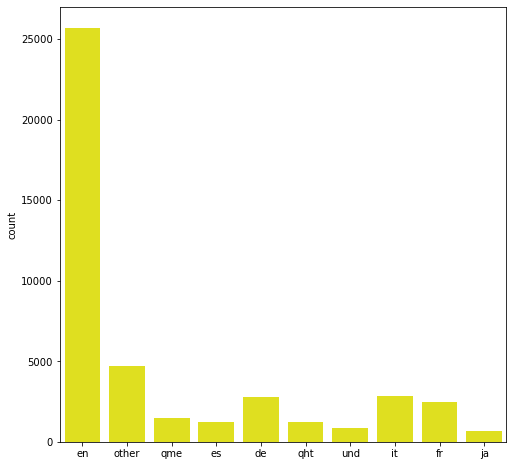

In [124]:
plt.figure(figsize=(8,8))
sns.countplot(x=language_final,color='yellow')

In [125]:
data8 = data8.drop('Language',axis=1)
data8['Language'] = language_final

## now hashtags one of the hardest EDA part in the entire Dataset in which need to perforn some of the jason parsing on string and calculate the hashtag frequency.

In [126]:
data8.columns

Index(['Username', 'hashtag', 'hastag_counts', 'LikeCount', 'RetweetCount',
       'Replycount', 'Language'],
      dtype='object')

In [127]:
data8['hashtag']

0         ['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...
1         ['#Russia', '#Ukraine', '#UkraineWar', '#Russi...
2         ['#Russia', '#Ukraine', '#UkraineWar', '#Russi...
3         ['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...
4         ['#Russia', '#Ukraine', '#UkraineWar', '#Russi...
                                ...                        
399851         ['#RussiaUkraineWar', '#Russia', '#Ukraine']
399852                                         ['#Ukraine']
399853              ['#Putin,', '#Ukrajina,', '#Zelenskij']
399854                                        ['#Ukraine,']
399855    ['#britishsummertime', '#clocksgoforward', '#g...
Name: hashtag, Length: 44066, dtype: object

In [128]:
hashtag = list(data8['hashtag'])

In [129]:
hashtag

["['#Kharkiv.', '#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe', '#EU', '#NATO', '#US']",
 "['#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe', '#EU', '#NATO', '#US']",
 "['#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe', '#EU', '#NATO', '#US']",
 "['#Mariupol', '#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe', '#EU', '#NATO', '#US']",
 "['#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe', '#EU', '#NATO', '#US']",
 "['#KYIV', '#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe', '#EU', '#NATO', '#US']",
 "['#KYIV', '#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe', '#EU', '#NATO', '#US']",
 "['#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#US']",
 "['#Kyiv.', '#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe', '#EU', '#NATO', '#US']",
 "['#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe', '#EU', '#NATO', '#US']",
 "['#Russia', '#Ukraine', '#UkraineWar', '#RussiaWar', '#Europe

In [130]:
def hashtag_getter(hashtag_strings_list):
    hashtag_list = []
    for i in hashtag_strings_list:
        k = i.split("'")
        m=[]
        hashtags=[]
        for i in k:
            m.append(i.strip())
        for i in range(len(m)):
            if i%2 !=0:
                hashtag_list.append(m[i])
    return hashtag_list
    

In [131]:
hashtag_list = hashtag_getter(hashtag)

In [132]:
len(hashtag_list)

177931

In [133]:
def remove_non_hashtags(hashtag_list):
    hashtags_nodummy = []
    for i in hashtag_list:
        if i[:1]=='#':
            hashtags_nodummy.append(i)
    return hashtags_nodummy

In [134]:
hashtags_all = remove_non_hashtags(hashtag_list)

In [135]:
len(hashtags_all)

175124

In [136]:
hashtag_set = set(hashtags_all)

In [137]:
len(hashtag_set)

22435

In [138]:
hashtag_set

{'#AntiRussiaHate',
 '#ekonomi',
 '#AllLivesMatter',
 '#summits',
 '#SG',
 '#ampelkoalition',
 '#Russian/#Putin',
 '#Importstopp',
 '#kırım',
 '#terroristattack',
 '#PlayForUkraine',
 '#AndrewAloha',
 '#Munich',
 '#RusyaUkrayna',
 '#AvrilHaines',
 '#busin…https://t.co/triHfV0T9r',
 '#HisSideOfTheWar',
 '#ukraineRussianwar',
 '#CIPS',
 '#RussiaUcrainia',
 '#RussianBluff',
 '#deephouse',
 '#peaceinUkraine🇺🇦',
 '#Weltspiegel_ARD',
 '#GujaratStudentsInUkraine',
 '#Hamsterkaeufe',
 '#Childrens',
 '#WakeUpCall',
 '#NigelFarage',
 '#CompanionAnimals',
 '#DogsAreFamily',
 '#blasphemy',
 '#MLB',
 '#Occupation',
 '#hotinauto',
 '#UA',
 '#DinghyInvasion',
 '#makeitblue',
 '#brokers',
 '#fundraising',
 '#uknews',
 '#federalreserve',
 '#NatoNazis',
 '#Immaculate',
 '#czollek',
 '#Fabrications?',
 '#BidenPolandVisit',
 '#IPL2022',
 '#τραπεζες',
 '#EUarmy',
 '#ノベルアッププラス',
 '#OOTT',
 '#ChefsForUkraine',
 '#Nestlé.',
 '#Pecresse',
 '#家庭菜園',
 '#🗣',
 '#terzaguerramondiale?',
 '#stopwar#stopwareverywhere#

In [139]:
hashtag_series = pd.DataFrame()

In [140]:
hashtag_series['hashtags'] = hashtags_all

In [141]:
hashtag_series.value_counts()

hashtags        
#Ukraine            15461
#UkraineWar         10676
#UkraineConflict     8842
#Putin               8194
#Russia              5931
                    ...  
#Putin-Aufkleber        1
#Putin-Besuch           1
#Putin-Bewegung         1
#Putin-Bigots           1
#🥰                      1
Length: 22435, dtype: int64

In [142]:
hashtgs_freq_count = pd.DataFrame(hashtag_series.value_counts())

In [143]:
hashtgs_freq_count= hashtgs_freq_count.reset_index()

In [144]:
hashtgs_freq_count['counts'] = hashtgs_freq_count[0]
hashtgs_freq_count= hashtgs_freq_count.drop(0,axis=1)

In [145]:
hashtgs_freq_count

,hashtags,counts
0,#Ukraine,15461
1,#UkraineWar,10676
2,#UkraineConflict,8842
3,#Putin,8194
4,#Russia,5931
...,...,...
22430,#Putin-Aufkleber,1
22431,#Putin-Besuch,1
22432,#Putin-Bewegung,1
22433,#Putin-Bigots,1


In [146]:
hashtags_top_50 = hashtgs_freq_count.iloc[:50]

In [147]:
hashtags_top_50

,hashtags,counts
0,#Ukraine,15461
1,#UkraineWar,10676
2,#UkraineConflict,8842
3,#Putin,8194
4,#Russia,5931
5,#UkraineRussiaWar,3219
6,#StopWar,2952
7,#Russian,2359
8,#ukraine,2336
9,#UkraineRussianWar,2191


<AxesSubplot:xlabel='counts', ylabel='hashtags'>

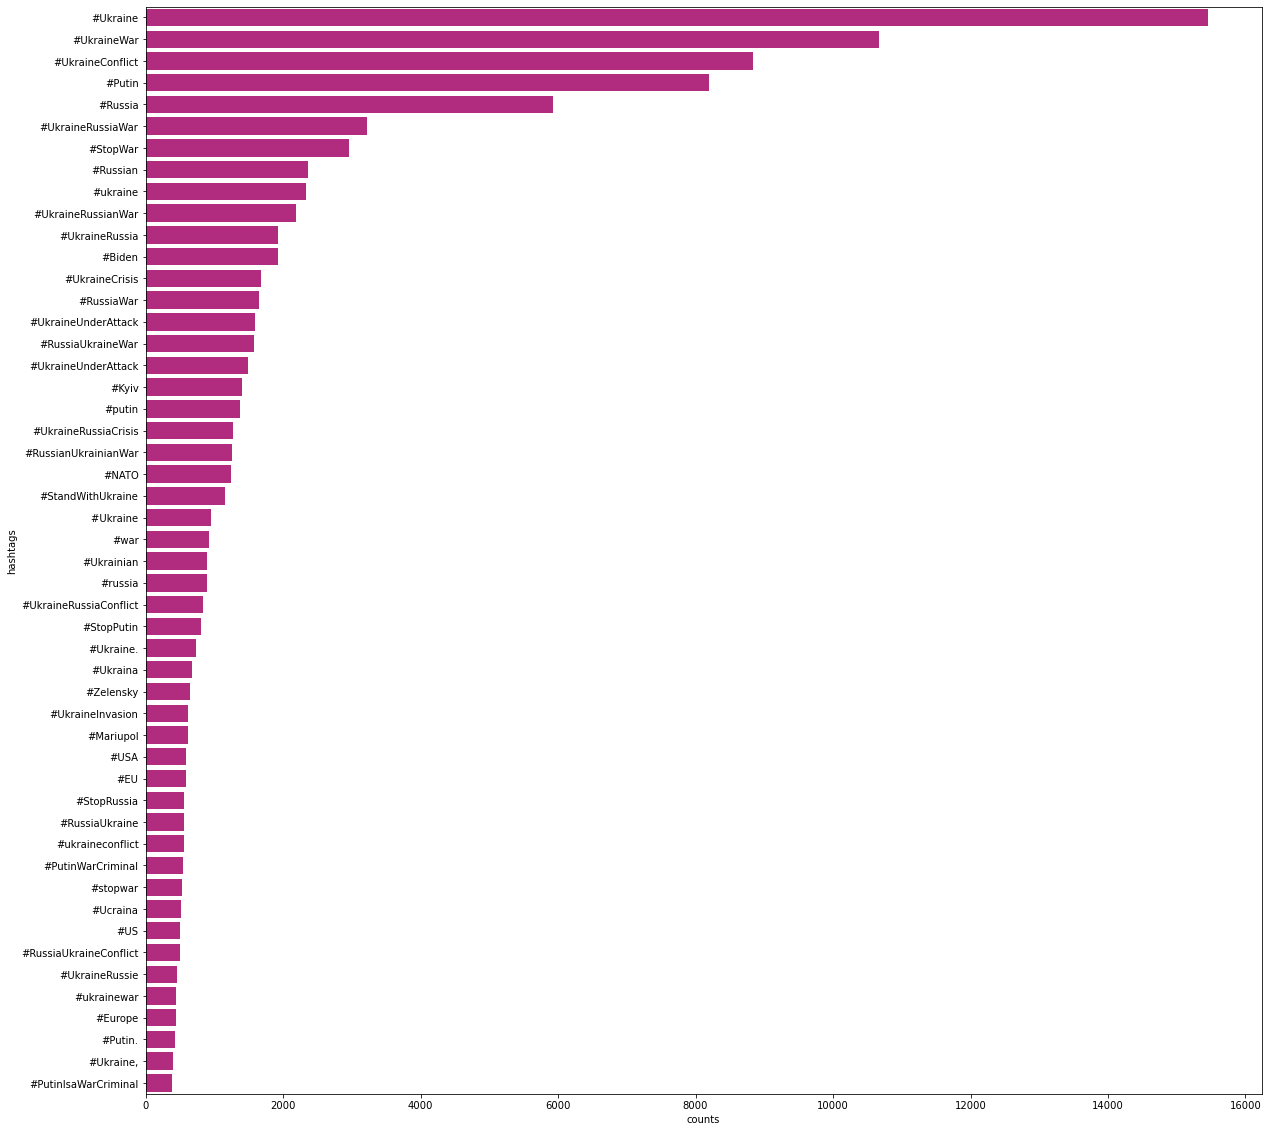

In [148]:
plt.figure(figsize=(20,20))
sns.barplot(x=hashtags_top_50.counts , y=hashtags_top_50.hashtags, color='mediumvioletred')

In [149]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44066 entries, 0 to 399855
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Text           44066 non-null  object 
 1   Username       44066 non-null  object 
 2   ReplyCount     44066 non-null  float64
 3   RetweetCount   44066 non-null  float64
 4   LikeCount      44066 non-null  float64
 5   QuoteCount     44066 non-null  object 
 6   Language       44066 non-null  object 
 7   hashtag        44066 non-null  object 
 8   hastag_counts  44066 non-null  float64
dtypes: float64(4), object(5)
memory usage: 3.4+ MB


In [150]:
text = pd.DataFrame(data6['Text'])

In [151]:
text

,Text
0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1,🇺🇦 Kharkiv is officially being struck by major...
2,🇺🇦 More angles on that strike in Kharkiv. #Rus...
3,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4,🇺🇦 Damage caused by strike in Kharkiv... #Russ...
...,...
399851,Russia’s mass media and telecommunications wat...
399852,@tony07653102 @CNEWS Pour comprendre un confli...
399853,"Putin ukrajinske vojnike naziva neonacizmom, a..."
399854,"Watch: amid war ruins in #Ukraine, unbowed cla..."


In [152]:
data8['Text'] = text

In [153]:
data8.head()

,Username,hashtag,hastag_counts,LikeCount,RetweetCount,Replycount,Language,Text
0,IdeologyWars,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0,more than 10,more than 50,2.0,en,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1,IdeologyWars,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,more than 10,more than 50,2.0,en,🇺🇦 Kharkiv is officially being struck by major...
2,IdeologyWars,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,more than 10,more than 50,1.0,en,🇺🇦 More angles on that strike in Kharkiv. #Rus...
3,IdeologyWars,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0,more than 10,more than 50,more than 10,en,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4,IdeologyWars,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,more than 10,more than 50,7.0,en,🇺🇦 Damage caused by strike in Kharkiv... #Russ...


In [154]:
tweet_en = data8[data8.Language == 'en'].drop('Language', axis=1)

In [155]:
tweet_en

,Username,hashtag,hastag_counts,LikeCount,RetweetCount,Replycount,Text
0,IdeologyWars,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0,more than 10,more than 50,2.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1,IdeologyWars,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,more than 10,more than 50,2.0,🇺🇦 Kharkiv is officially being struck by major...
2,IdeologyWars,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,more than 10,more than 50,1.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...
3,IdeologyWars,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0,more than 10,more than 50,more than 10,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4,IdeologyWars,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,more than 10,more than 50,7.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...
...,...,...,...,...,...,...,...
399849,others,"['#Biden', '#US', '#Needed', '#War:', '#Ultima...",13.0,3.0,1.0,0.0,#Biden Confirms Why the #US #Needed This #War:...
399850,others,"['#tsikhanouskaya:', '#putin', '#PutinIsaWarCr...",5.0,0.0,0.0,0.0,Remember this?\nSviatlana #tsikhanouskaya: You...
399851,others,"['#RussiaUkraineWar', '#Russia', '#Ukraine']",3.0,6.0,0.0,1.0,Russia’s mass media and telecommunications wat...
399854,others,"['#Ukraine,']",1.0,0.0,0.0,0.0,"Watch: amid war ruins in #Ukraine, unbowed cla..."


In [156]:
text = pd.DataFrame(tweet_en['Text'])

In [157]:
text

,Text
0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1,🇺🇦 Kharkiv is officially being struck by major...
2,🇺🇦 More angles on that strike in Kharkiv. #Rus...
3,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4,🇺🇦 Damage caused by strike in Kharkiv... #Russ...
...,...
399849,#Biden Confirms Why the #US #Needed This #War:...
399850,Remember this?\nSviatlana #tsikhanouskaya: You...
399851,Russia’s mass media and telecommunications wat...
399854,"Watch: amid war ruins in #Ukraine, unbowed cla..."


In [158]:
text = text.reset_index()
text = text.drop('index',axis=1)

In [159]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [160]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [161]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(text['Text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    try:
        compound = analyzer.polarity_scores(text['Text'][i])["compound"]
        pos = analyzer.polarity_scores(text['Text'][i])["pos"]
        neu = analyzer.polarity_scores(text['Text'][i])["neu"]
        neg = analyzer.polarity_scores(text['Text'][i])["neg"]
    
        scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
    except KeyError:
        pass
    
sentiments_score = pd.DataFrame.from_dict(scores)
text = text.join(sentiments_score)
text.head()

,Text,Compound,Positive,Negative,Neutral
0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,0.0000,0.0,0.000,1.000
1,🇺🇦 Kharkiv is officially being struck by major...,-0.5849,0.0,0.220,0.780
2,🇺🇦 More angles on that strike in Kharkiv. #Rus...,-0.1280,0.0,0.081,0.919
3,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,-0.3612,0.0,0.128,0.872
4,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,-0.5719,0.0,0.239,0.761


In [162]:
text.isnull().sum()

Text        0
Compound    0
Positive    0
Negative    0
Neutral     0
dtype: int64

In [163]:
conditions = [
    (text['Compound'] <= -0.5),
    (text['Compound'] > -0.5) & (text['Compound'] < 0.5),
    (text['Compound'] > 0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
text['Category'] = np.select(conditions, values)
text.head()

,Text,Compound,Positive,Negative,Neutral,Category
0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,0.0000,0.0,0.000,1.000,Neutral
1,🇺🇦 Kharkiv is officially being struck by major...,-0.5849,0.0,0.220,0.780,Negative
2,🇺🇦 More angles on that strike in Kharkiv. #Rus...,-0.1280,0.0,0.081,0.919,Neutral
3,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,-0.3612,0.0,0.128,0.872,Neutral
4,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,-0.5719,0.0,0.239,0.761,Negative


In [164]:
text.corr()

,Compound,Positive,Negative,Neutral
Compound,1.000000,0.663379,-0.734211,0.105013
Positive,0.663379,1.000000,-0.205111,-0.587320
Negative,-0.734211,-0.205111,1.000000,-0.671678
Neutral,0.105013,-0.587320,-0.671678,1.000000


<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

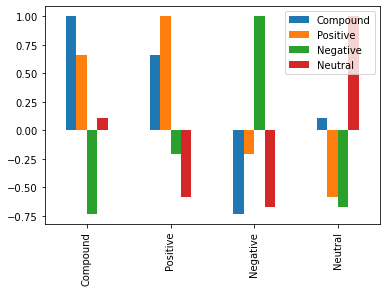

In [165]:
plt.figure(figsize=(20,20))
text.corr().plot(kind='bar')

<AxesSubplot:>

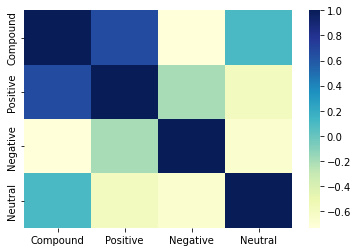

In [166]:
plt.figure(figsize=(6,4))
sns.heatmap(text.corr(),cmap="YlGnBu",annot=False)

In [167]:
dataset = text[['Text','Category']]
textdata, category = list(dataset['Text']), list(dataset['Category'])

In [168]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [169]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [170]:
def preprocess(textdata):
    processedText = []
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [171]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Rohan
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [172]:
import regex as re
nltk.download('wordnet')
processedtext = preprocess(textdata)

[nltk_data] Downloading package wordnet to C:\Users\Rohan
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [173]:
processedtext

['massive explosion rock kharkiv russia ukraine ukrainewar russiawar europe eu nato u 29 URL ',
 'kharkiv is officially being struck by major strike russia ukraine ukrainewar russiawar europe eu nato u 30 URL ',
 'more angle on that strike in kharkiv russia ukraine ukrainewar russiawar europe eu nato u 31 URL ',
 'bm 21 grad strike opening on mariupol city russia ukraine ukrainewar russiawar europe eu nato u 32 URL ',
 'damage caused by strike in kharkiv russia ukraine ukrainewar russiawar europe eu nato u 33 URL ',
 'boryspil airport in kyiv is under attack russia ukraine ukrainewar russiawar europe eu nato u 34 ',
 'boryspil airport in kyiv is under attack russia ukraine ukrainewar russiawar europe eu nato u ',
 'statement from president biden russia ukraine ukrainewar russiawar u URL ',
 'air raid siren are apparently in kyiv russia ukraine ukrainewar russiawar europe eu nato u 35 ',
 'mariupol right now russia ukraine ukrainewar russiawar europe eu nato u 35 URL ',
 'saratov right 

In [174]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Rohan
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rohan
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [175]:
processed_text_stop =[]
for sentence in processedtext:
    sentence = sentence.lower()
    words = word_tokenize(sentence)
    words = [word for word in words if word not in stopwords.words('english') and word.isalnum()]
    processed_text = ' '.join(words)
    processed_text_stop.append(processed_text)

In [176]:
processed_text_stop [:5]

['massive explosion rock kharkiv russia ukraine ukrainewar russiawar europe eu nato u 29 url',
 'kharkiv officially struck major strike russia ukraine ukrainewar russiawar europe eu nato u 30 url',
 'angle strike kharkiv russia ukraine ukrainewar russiawar europe eu nato u 31 url',
 'bm 21 grad strike opening mariupol city russia ukraine ukrainewar russiawar europe eu nato u 32 url',
 'damage caused strike kharkiv russia ukraine ukrainewar russiawar europe eu nato u 33 url']

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm='l2')
tfidf_matrix = vectorizer.fit_transform(processed_text_stop)

In [179]:
print(tfidf_matrix)

  (0, 26637)	0.07329341978039611
  (0, 456)	0.42317130159185895
  (0, 16392)	0.21436540111475766
  (0, 8723)	0.2583821983456446
  (0, 8757)	0.2558030306781633
  (0, 21537)	0.2233622905523049
  (0, 26012)	0.12420925952193657
  (0, 25854)	0.08210735216376144
  (0, 21314)	0.12229307934232744
  (0, 13604)	0.2947954051140757
  (0, 21062)	0.4397234396773446
  (0, 9009)	0.34597695982808296
  (0, 15228)	0.38785060199609267
  (1, 507)	0.32031353634364584
  (1, 23863)	0.2961256799223337
  (1, 14928)	0.3443562313932941
  (1, 23890)	0.41910403371207794
  (1, 17294)	0.42964290849534253
  (1, 26637)	0.07051834815329626
  (1, 16392)	0.20624899251698944
  (1, 8723)	0.24859920405058963
  (1, 8757)	0.24611769010205073
  (1, 21537)	0.21490523728704677
  (1, 26012)	0.11950638724560976
  (1, 25854)	0.07899856307943913
  :	:
  (25713, 16213)	0.40650447474600093
  (25713, 5173)	0.43900374414329435
  (25713, 18560)	0.3034842281549112
  (25713, 27403)	0.25097191176177286
  (25713, 21252)	0.36354277746640556
  

In [265]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50)
X_svd = svd.fit_transform(tfidf_matrix)

In [266]:
X_svd.shape

(25715, 60)

In [267]:
cat = list(text.Category)

In [268]:
encoded_category = []
for i in cat:
    if i == 'Neutral':
        encoded_category.append(0)
    elif i== 'Positive':
        encoded_category.append(1)
    else:
        encoded_category.append(-1)

In [269]:
encoded_category

[0,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 -1,
 1,
 0,
 -1,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 -1,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 1,
 -1,
 0,
 -1,


In [257]:
from sklearn.model_selection import train_test_split

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X_svd[:5000],encoded_category[:5000],test_size = 0.10, random_state = 50)

In [324]:
X_train

array([[ 0.16785883, -0.11621103,  0.00966057, ..., -0.07708106,
         0.00482313,  0.04492997],
       [ 0.12834932, -0.08362413,  0.01315848, ...,  0.04900581,
         0.04628362,  0.02252737],
       [ 0.09575533, -0.07447434,  0.1122598 , ..., -0.00037625,
         0.01401159,  0.00906054],
       ...,
       [ 0.12199533,  0.08954335,  0.08238576, ...,  0.00815995,
        -0.02316019,  0.03481288],
       [ 0.06380079, -0.00237072, -0.07097505, ...,  0.02267775,
         0.03435264, -0.00932406],
       [ 0.10561332, -0.06147329,  0.02258545, ..., -0.0573843 ,
        -0.0330849 ,  0.03578654]])

In [317]:
# X_test = X_train[:300]
# y_test = y_train[:300]

In [325]:
len(y_test)

500

In [260]:
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [326]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
ys_predict = SVCmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

          -1       0.74      0.46      0.57       133
           0       0.70      0.93      0.80       303
           1       0.60      0.14      0.23        64

    accuracy                           0.71       500
   macro avg       0.68      0.51      0.53       500
weighted avg       0.70      0.71      0.67       500

Confusion Matrix: 
 [[ 61  71   1]
 [ 15 283   5]
 [  6  49   9]]
Accuracy Score: 
 0.706


In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [327]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = lda.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [328]:
RFCModel = RandomForestClassifier(n_estimators=100)
RFCModel.fit(X_train, y_train)
ys_predict = RFCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

          -1       0.77      0.42      0.54       133
           0       0.69      0.95      0.80       303
           1       0.80      0.12      0.22        64

    accuracy                           0.71       500
   macro avg       0.75      0.50      0.52       500
weighted avg       0.73      0.71      0.66       500

Confusion Matrix: 
 [[ 56  77   0]
 [ 12 289   2]
 [  5  51   8]]
Accuracy Score: 
 0.706


In [329]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
ys_predict = LRmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

          -1       0.75      0.46      0.57       133
           0       0.70      0.94      0.80       303
           1       0.69      0.14      0.23        64

    accuracy                           0.71       500
   macro avg       0.72      0.51      0.54       500
weighted avg       0.71      0.71      0.67       500

Confusion Matrix: 
 [[ 61  71   1]
 [ 15 285   3]
 [  5  50   9]]
Accuracy Score: 
 0.71


In [330]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
ys_predict = SVCmodel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

          -1       0.74      0.46      0.57       133
           0       0.70      0.93      0.80       303
           1       0.60      0.14      0.23        64

    accuracy                           0.71       500
   macro avg       0.68      0.51      0.53       500
weighted avg       0.70      0.71      0.67       500

Confusion Matrix: 
 [[ 61  71   1]
 [ 15 283   5]
 [  6  49   9]]
Accuracy Score: 
 0.706
